<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/CNN_TATASTEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'TATASTEEL'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS,index_col='Date')
test_df= pd.read_csv(TEST_DS,index_col='Date')
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2017-12-22,716.80,716.80,707.10,711.20,3322839.0
2017-12-26,714.00,725.00,712.00,721.65,6011430.0
2017-12-27,721.75,729.60,717.90,723.45,3611513.0


In [ ]:
df= pd.concat((train_df[['Open','High','Low','Close','Volume']],test_df[['Open','High','Low','Close','Volume']]),axis=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2018-12-26,509.00,517.30,504.40,513.45,4953741.0
2018-12-27,518.00,519.80,504.95,506.50,5016931.0
2018-12-28,508.20,516.45,508.05,512.85,6307408.0


In [ ]:
if(STOCK=='TCS'): #TCS stock split
 df=df[:1085]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2018-12-26,509.00,517.30,504.40,513.45,4953741.0
2018-12-27,518.00,519.80,504.95,506.50,5016931.0
2018-12-28,508.20,516.45,508.05,512.85,6307408.0


In [ ]:
pd.set_option("display.max_rows", 100)
if STOCK=='RELIANCE':
  df=df[:850]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,425.00,426.80,423.65,425.90,1193408.0
2014-01-02,426.00,435.50,417.00,419.20,4000266.0
2014-01-03,416.50,419.40,409.00,412.50,3183770.0
2014-01-06,410.95,415.70,404.60,408.30,2704614.0
2014-01-07,409.90,411.90,392.55,394.70,3900410.0
...,...,...,...,...,...
2018-12-26,509.00,517.30,504.40,513.45,4953741.0
2018-12-27,518.00,519.80,504.95,506.50,5016931.0
2018-12-28,508.20,516.45,508.05,512.85,6307408.0


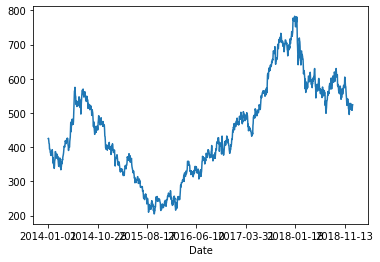

In [ ]:
df['Open'].plot()

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Input,Dropout, LSTM, MaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
scaler = StandardScaler()
train_x = scaler.fit_transform(df[["Open","High","Low","Close","Volume"]])

In [ ]:
def create_dataset(data,start,end,time_step=1,):
    dataX, dataY = [], []
    for i in range(start,end):
        dataX.append(data[i-time_step:i, :])
        dataY.append(data[i , 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_x,60,len(train_x)-60,60)
X_test, y_test = create_dataset(train_x,len(train_x)-60,len(train_x),60)

In [ ]:
X_test

array([[[ 0.81802823,  0.76706802,  0.78352371,  0.74036614,
         -0.04081808],
        [ 0.70990063,  0.76170629,  0.74231058,  0.74181094,
          0.14186601],
        [ 0.80865717,  0.77242975,  0.80358321,  0.75698133,
          0.39379031],
        ...,
        [ 1.15682804,  1.10306989,  0.95129401,  0.9422768 ,
          2.09054808],
        [ 0.92615582,  0.91576672,  0.8236427 ,  0.95636359,
          0.25071306],
        [ 0.95498985,  0.97724791,  0.96004725,  0.93035721,
          0.32489957]],

       [[ 0.70990063,  0.76170629,  0.74231058,  0.74181094,
          0.14186601],
        [ 0.80865717,  0.77242975,  0.80358321,  0.75698133,
          0.39379031],
        [ 0.77477719,  0.80996188,  0.81926608,  0.85125446,
          1.17212789],
        ...,
        [ 0.92615582,  0.91576672,  0.8236427 ,  0.95636359,
          0.25071306],
        [ 0.95498985,  0.97724791,  0.96004725,  0.93035721,
          0.32489957],
        [ 0.90272818,  0.92970722,  0.91482221, 

In [ ]:
  # define the model
model = Sequential()
model.add(Conv1D(filters=128,kernel_size=7,strides=1, activation="leaky_relu"))
model.add(AveragePooling1D())
model.add(Conv1D(filters=64,kernel_size=5,strides=1, activation="leaky_relu"))
model.add(Dropout(0.4))
model.add(Conv1D(filters=32,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(AveragePooling1D())
model.add(Conv1D(filters=16,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(Dropout(0.4))
model.add(Conv1D(filters=8,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='leaky_relu'))
# compile the model
model.compile(optimizer='adam', loss='mse')
    

In [ ]:

cnn_result = model.fit(X_train,y_train,epochs=300,batch_size=30,verbose=1)

Epoch 1/300
38/38 [==============================] - 14s 11ms/step - loss: 0.2597
Epoch 2/300
38/38 [==============================] - 0s 7ms/step - loss: 0.1183
Epoch 3/300
38/38 [==============================] - 0s 8ms/step - loss: 0.0983
Epoch 4/300
38/38 [==============================] - 0s 7ms/step - loss: 0.0921
Epoch 5/300
38/38 [==============================] - 0s 7ms/step - loss: 0.0854
Epoch 6/300
38/38 [==============================] - 0s 8ms/step - loss: 0.0713
Epoch 7/300
38/38 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 8/300
38/38 [==============================] - 0s 7ms/step - loss: 0.0577
Epoch 9/300
38/38 [==============================] - 0s 8ms/step - loss: 0.0636
Epoch 10/300
38/38 [==============================] - 0s 8ms/step - loss: 0.0568
Epoch 11/300
38/38 [==============================] - 0s 8ms/step - loss: 0.0521
Epoch 12/300
38/38 [==============================] - 0s 7ms/step - loss: 0.0536
Epoch 13/300
38/38 [===============

In [ ]:
pred=model.predict(X_train)

In [ ]:
def reshape_1d(ar):
  sz=len(ar)
  app=np.zeros((sz,4))
  #print(app.shape)
  nar= ar.copy()
  nar= np.reshape(nar,(sz,1))
  #print(ar.shape)
  xar= np.concatenate((nar,app),axis=1)
  #print(xar.shape)
  #print(xar)
  return xar


In [ ]:
def scale_back(arr):
  narr=reshape_1d(arr)
  narr=scaler.inverse_transform(narr)
  return narr[:,0]


In [ ]:
pred_i= scale_back(pred)
y_train_i= scale_back(y_train)


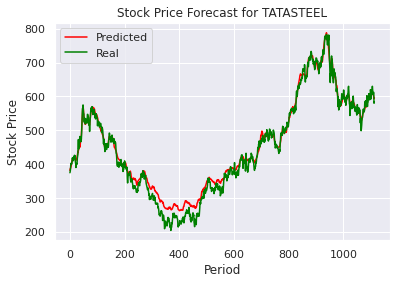

In [ ]:
plt.plot(pred_i, color="red", label= "Predicted")
plt.plot(y_train_i, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
pred=model.predict(X_test)


In [ ]:
pred_i= scale_back(pred)
ytest_i= scale_back(y_test)

In [ ]:
X_test

array([[[ 0.81802823,  0.76706802,  0.78352371,  0.74036614,
         -0.04081808],
        [ 0.70990063,  0.76170629,  0.74231058,  0.74181094,
          0.14186601],
        [ 0.80865717,  0.77242975,  0.80358321,  0.75698133,
          0.39379031],
        ...,
        [ 1.15682804,  1.10306989,  0.95129401,  0.9422768 ,
          2.09054808],
        [ 0.92615582,  0.91576672,  0.8236427 ,  0.95636359,
          0.25071306],
        [ 0.95498985,  0.97724791,  0.96004725,  0.93035721,
          0.32489957]],

       [[ 0.70990063,  0.76170629,  0.74231058,  0.74181094,
          0.14186601],
        [ 0.80865717,  0.77242975,  0.80358321,  0.75698133,
          0.39379031],
        [ 0.77477719,  0.80996188,  0.81926608,  0.85125446,
          1.17212789],
        ...,
        [ 0.92615582,  0.91576672,  0.8236427 ,  0.95636359,
          0.25071306],
        [ 0.95498985,  0.97724791,  0.96004725,  0.93035721,
          0.32489957],
        [ 0.90272818,  0.92970722,  0.91482221, 

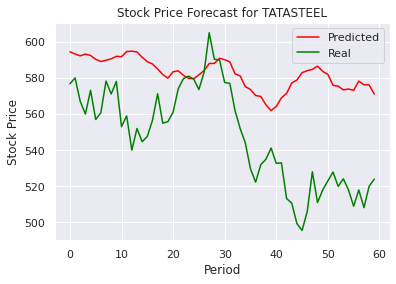

In [ ]:
plt.plot(pred_i, color="red", label= "Predicted")
plt.plot(ytest_i, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test=ytest_i
pred=pred_i
import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
 
MAE = mean_absolute_error(test, pred) 
MSE = mean_squared_error(test, pred) 
RMSE = math.sqrt(MSE)
R2 = r2_score(test, pred) 
real_arima_stock_price_mean = test.mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Stock Price Mean:", real_arima_stock_price_mean)
print("RMSE/REAL_STOCK_PRICE_MEAN:", RMSE/real_arima_stock_price_mean) 

Mean Absolute Error: 35.311749630880314
Mean Squared Error: 1751.2868145392533
Root Mean Squared Error: 41.84837887588064
R Squared: -1.3999867634600167
Real Stock Price Mean: 547.7716666666668
RMSE/REAL_STOCK_PRICE_MEAN: 0.07639748716931441
